# Introduction

### Project Overview

<p>A brief description of the project and objectives.</p>

### Problem Statement

<ul>
<li>What are the most significant factors influencing fuel efficiency in Vehicles ?</li>
<li>How can they be optimized to reduce fuel consumption ?</li>
<li>How can we minimize the environmental impact ?</li>
</ul>

### Dataset Description

<ol>
    <li>Model year</li>
    <li>Make</li>
    <li>Model</li>
    <li>Vehicle class</li>
    <li>Engine size (L) - Larger Engine Size is more powerful but lower fuel efficiency</li>
    <li>Cylinders - More Cylinders more powerful but lower fuel efficiency</li>
    <li>Transmission</li>
    <li>Fuel type</li>
    <li>City (L/100 km)</li>
    <li>Highway (L/100 km)</li>
    <li>Combined (L/100 km)</li>
    <li>Combined (mpg) - Overall fuel efficiency Higher the better</li>
    <li>CO2 emissions (g/km) - Gives us the amount of C02 produced while driving Lower is good for environment</li>
    <li>CO2 rating - Value is higher means fewer emissions Higher is good for environment</li>
    <li>Smog rating - Higher rating cleaner emission Good for environment</li>
</ol>

### Objective

We can perform the following analysis
<ul>
    <li>Engine Size, Cylinders and Class vs. Fuel Usage</li>
    <li>Engine Size, Cylinders and Class vs. Fuel Efficiency</li>
    <li>Engine Size, Cylinders and Class vs. CO2 Emmission</li>
    <li>Model Year vs Fuel Usage, Fuel Efficiency and CO2 Emmission</li>
    <li>Build Fuel Efficiency Predictive Model</li>
    <li>Develop a recommendation system</li>
</ul>

# Data Loading and Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

#### Data Import

<p>
    We have 2005-2014 dataset, 2015-2019 dataset, 2020 dataset, 2021 dataset, 2022 dataset and 2023 dataset<br/>
    Some dataset are in different encoding, so before reading the csv file we convert it to utf-8 format.<br/>
    The following 2 functions are created to do that
</p>

In [2]:
def check_encoding(filename):
    with open(filename, 'rb') as f:
        result = chardet.detect(f.read())
    return result

In [3]:
def convert_utf8(inputfile, outputfile, result):
    if result['encoding'] != 'utf-8':
        with open(inputfile, 'r', encoding=result['encoding']) as f:
            content = f.read()
        with open(outputfile, 'w', encoding='utf-8') as f:
            f.write(content)

<p>Loading the data using Pandas read_csv</p>

In [4]:
inputfilename = 'my2005-2014-fuel-consumption-ratings.csv'
outputfilename = 'my2005-2014-fuel-consumption-ratings-utf8.csv'
inputfileencoding = check_encoding(inputfilename)
convert_utf8(inputfilename, outputfilename, inputfileencoding)
fuel20052014 = pd.read_csv(outputfilename)

In [5]:
inputfilename = 'my2015-2019-fuel-consumption-ratings.csv'
outputfilename = 'my2015-2019-fuel-consumption-ratings-utf8.csv'
inputfileencoding = check_encoding(inputfilename)
convert_utf8(inputfilename, outputfilename, inputfileencoding)
fuel20152019 = pd.read_csv(outputfilename)

In [6]:
inputfilename = 'my2020-fuel-consumption-ratings.csv'
outputfilename = 'my2020-fuel-consumption-ratings-utf8.csv'
inputfileencoding = check_encoding(inputfilename)
convert_utf8(inputfilename, outputfilename, inputfileencoding)
fuel2020 = pd.read_csv(outputfilename)

In [7]:
inputfilename = 'my2021-fuel-consumption-ratings.csv'
outputfilename = 'my2021-fuel-consumption-ratings-utf8.csv'
inputfileencoding = check_encoding(inputfilename)
convert_utf8(inputfilename, outputfilename, inputfileencoding)
fuel2021 = pd.read_csv(outputfilename)

In [8]:
inputfilename = 'my2022-fuel-consumption-ratings.csv'
outputfilename = 'my2022-fuel-consumption-ratings-utf8.csv'
inputfileencoding = check_encoding(inputfilename)
convert_utf8(inputfilename, outputfilename, inputfileencoding)
fuel2022 = pd.read_csv(outputfilename)

In [9]:
inputfilename = 'my2024-fuel-consumption-ratings.csv'
outputfilename = 'my2024-fuel-consumption-ratings-utf8.csv'
inputfileencoding = check_encoding(inputfilename)
convert_utf8(inputfilename, outputfilename, inputfileencoding)
fuel2024 = pd.read_csv(outputfilename)

In [10]:
inputfilename = 'my2023-fuel-consumption-ratings.csv'
outputfilename = 'my2023-fuel-consumption-ratings-utf8.csv'
inputfileencoding = check_encoding(inputfilename)
convert_utf8(inputfilename, outputfilename, inputfileencoding)
fuel2023 = pd.read_csv(outputfilename)

#### Data Overview

In [11]:
fuel20052014.head(3)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2005,Acura,1.7EL,Compact,1.7,4,A4,X,9.2,7.2,8.3,34,191,NaN,NaN
1,2005,Acura,1.7EL,Compact,1.7,4,M5,X,9.1,7.3,8.3,34,191,NaN,NaN
2,2005,Acura,MDX AWD,Sport utility vehicle,3.5,6,A5,Z,15.9,11.1,13.7,21,315,NaN,NaN


In [12]:
fuel20052014.tail(3)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
10558,2014,Volvo,XC70 AWD,Sport utility vehicle: Small,3.0,6,AS6,X,13.4,9.8,11.8,24,271,NaN,NaN
10559,2014,Volvo,XC70 AWD,Sport utility vehicle: Small,3.2,6,AS6,X,12.9,9.3,11.3,25,260,NaN,NaN
10560,2014,Volvo,XC90 AWD,Sport utility vehicle: Standard,3.2,6,AS6,X,14.9,10.2,12.8,22,294,NaN,NaN


In [13]:
fuel20052014.columns

Index(['Model year', 'Make', 'Model', 'Vehicle class', 'Engine size (L)',
       'Cylinders', 'Transmission', 'Fuel type', 'City (L/100 km)',
       'Highway (L/100 km)', 'Combined (L/100 km)', 'Combined (mpg)',
       'CO2 emissions (g/km)', 'CO2 rating', 'Smog rating'],
      dtype='object')

In [14]:
fuel20052014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10561 entries, 0 to 10560
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            10561 non-null  int64  
 1   Make                  10561 non-null  object 
 2   Model                 10561 non-null  object 
 3   Vehicle class         10561 non-null  object 
 4   Engine size (L)       10561 non-null  float64
 5   Cylinders             10561 non-null  int64  
 6   Transmission          10561 non-null  object 
 7   Fuel type             10561 non-null  object 
 8   City (L/100 km)       10561 non-null  float64
 9   Highway (L/100 km)    10561 non-null  float64
 10  Combined (L/100 km)   10561 non-null  float64
 11  Combined (mpg)        10561 non-null  int64  
 12  CO2 emissions (g/km)  10561 non-null  int64  
 13  CO2 rating            0 non-null      float64
 14  Smog rating           0 non-null      float64
dtypes: float64(6), int6

In [15]:
fuel20152019.head(3)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2015,Acura,ILX,Compact,2.0,4,AS5,Z,9.7,6.7,8.3,34,191,NaN,NaN
1,2015,Acura,ILX,Compact,2.4,4,M6,Z,10.8,7.4,9.3,30,214,NaN,NaN
2,2015,Acura,ILX Hybrid,Compact,1.5,4,AV7,Z,6.0,6.1,6.1,46,140,NaN,NaN


In [16]:
fuel20152019.tail(3)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
5428,2019,Volvo,XC60 T6 AWD,Sport utility vehicle: Small,2.0,4,AS8,Z,11.8,8.6,10.4,27,242,5.0,7.0
5429,2019,Volvo,XC90 T5 AWD,Sport utility vehicle: Standard,2.0,4,AS8,Z,11.3,8.5,10.0,28,233,5.0,5.0
5430,2019,Volvo,XC90 T6 AWD,Sport utility vehicle: Standard,2.0,4,AS8,Z,12.1,8.9,10.7,26,250,4.0,7.0


In [17]:
fuel20152019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5431 entries, 0 to 5430
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            5431 non-null   int64  
 1   Make                  5431 non-null   object 
 2   Model                 5431 non-null   object 
 3   Vehicle class         5431 non-null   object 
 4   Engine size (L)       5431 non-null   float64
 5   Cylinders             5431 non-null   int64  
 6   Transmission          5431 non-null   object 
 7   Fuel type             5431 non-null   object 
 8   City (L/100 km)       5431 non-null   float64
 9   Highway (L/100 km)    5431 non-null   float64
 10  Combined (L/100 km)   5431 non-null   float64
 11  Combined (mpg)        5431 non-null   int64  
 12  CO2 emissions (g/km)  5431 non-null   int64  
 13  CO2 rating            4303 non-null   float64
 14  Smog rating           3197 non-null   float64
dtypes: float64(6), int64(

In [18]:
fuel2020.head(3)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2020,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199,6,3
1,2020,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS9,Z,12.3,9.2,10.9,26,254,4,3
2,2020,Acura,MDX SH-AWD A-SPEC,Sport utility vehicle: Small,3.5,6,AS9,Z,12.2,9.5,11.0,26,258,4,3


In [19]:
fuel2020.tail(3)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
972,2020,Volvo,XC60 T6 AWD,Sport utility vehicle: Small,2.0,4,AS8,Z,11.7,8.6,10.3,27,240,5,7
973,2020,Volvo,XC90 T5 AWD,Sport utility vehicle: Standard,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,5,5
974,2020,Volvo,XC90 T6 AWD,Sport utility vehicle: Standard,2.0,4,AS8,Z,12.2,8.7,10.7,26,248,4,7


In [20]:
fuel2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            975 non-null    int64  
 1   Make                  975 non-null    object 
 2   Model                 975 non-null    object 
 3   Vehicle class         975 non-null    object 
 4   Engine size (L)       975 non-null    float64
 5   Cylinders             975 non-null    int64  
 6   Transmission          975 non-null    object 
 7   Fuel type             975 non-null    object 
 8   City (L/100 km)       975 non-null    float64
 9   Highway (L/100 km)    975 non-null    float64
 10  Combined (L/100 km)   975 non-null    float64
 11  Combined (mpg)        975 non-null    int64  
 12  CO2 emissions (g/km)  975 non-null    int64  
 13  CO2 rating            975 non-null    int64  
 14  Smog rating           975 non-null    int64  
dtypes: float64(4), int64(6)

In [21]:
fuel2021.head(3)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2021,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199,6,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,256,4,3
2,2021,Acura,RDX SH-AWD,Sport utility vehicle: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6


In [22]:
fuel2021.tail(3)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
967,2021,Volvo,XC60 T6 AWD,Sport utility vehicle: Small,2.0,4,AS8,Z,11.7,8.6,10.3,27,240,5,7
968,2021,Volvo,XC90 T5 AWD,Sport utility vehicle: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5
969,2021,Volvo,XC90 T6 AWD,Sport utility vehicle: Standard,2.0,4,AS8,Z,12.1,8.5,10.5,27,245,5,7


In [23]:
fuel2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            970 non-null    int64  
 1   Make                  970 non-null    object 
 2   Model                 970 non-null    object 
 3   Vehicle class         970 non-null    object 
 4   Engine size (L)       970 non-null    float64
 5   Cylinders             970 non-null    int64  
 6   Transmission          970 non-null    object 
 7   Fuel type             970 non-null    object 
 8   City (L/100 km)       970 non-null    float64
 9   Highway (L/100 km)    970 non-null    float64
 10  Combined (L/100 km)   970 non-null    float64
 11  Combined (mpg)        970 non-null    int64  
 12  CO2 emissions (g/km)  970 non-null    int64  
 13  CO2 rating            970 non-null    int64  
 14  Smog rating           970 non-null    int64  
dtypes: float64(4), int64(6)

In [24]:
fuel2022.head(3)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,MDX Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5


In [25]:
fuel2022.tail(3)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
973,2022,Volvo,XC60 B6 AWD,Sport utility vehicle: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
974,2022,Volvo,XC90 T5 AWD,Sport utility vehicle: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5
975,2022,Volvo,XC90 T6 AWD,Sport utility vehicle: Standard,2.0,4,AS8,Z,12.4,8.9,10.8,26,252,5,7


In [26]:
fuel2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            976 non-null    int64  
 1   Make                  976 non-null    object 
 2   Model                 976 non-null    object 
 3   Vehicle class         976 non-null    object 
 4   Engine size (L)       976 non-null    float64
 5   Cylinders             976 non-null    int64  
 6   Transmission          976 non-null    object 
 7   Fuel type             976 non-null    object 
 8   City (L/100 km)       976 non-null    float64
 9   Highway (L/100 km)    976 non-null    float64
 10  Combined (L/100 km)   976 non-null    float64
 11  Combined (mpg)        976 non-null    int64  
 12  CO2 emissions (g/km)  976 non-null    int64  
 13  CO2 rating            976 non-null    int64  
 14  Smog rating           976 non-null    int64  
dtypes: float64(4), int64(6)

In [27]:
fuel2023.head(3)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2023,Acura,Integra,Full-size,1.5,4,AV7,Z,7.9,6.3,7.2,39,167,6,7
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6


In [28]:
fuel2023.tail(3)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
830,2023,Volvo,XC60 B6 AWD,Sport utility vehicle: Small,2.0,4,AS8,Z,11.1,8.7,10.0,28,233,5,7
831,2023,Volvo,XC90 B5 AWD,Sport utility vehicle: Standard,2.0,4,AS8,Z,10.5,8.4,9.6,29,223,5,5
832,2023,Volvo,XC90 B6 AWD,Sport utility vehicle: Standard,2.0,4,AS8,Z,11.9,9.1,10.6,27,249,5,7


In [29]:
fuel2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            833 non-null    int64  
 1   Make                  833 non-null    object 
 2   Model                 833 non-null    object 
 3   Vehicle class         833 non-null    object 
 4   Engine size (L)       833 non-null    float64
 5   Cylinders             833 non-null    int64  
 6   Transmission          833 non-null    object 
 7   Fuel type             833 non-null    object 
 8   City (L/100 km)       833 non-null    float64
 9   Highway (L/100 km)    833 non-null    float64
 10  Combined (L/100 km)   833 non-null    float64
 11  Combined (mpg)        833 non-null    int64  
 12  CO2 emissions (g/km)  833 non-null    int64  
 13  CO2 rating            833 non-null    int64  
 14  Smog rating           833 non-null    int64  
dtypes: float64(4), int64(6)

In [30]:
fuel2024.head(3)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2024,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
1,2024,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
2,2024,Acura,Integra Type S,Full-size,2.0,4,M6,Z,11.1,8.3,9.9,29,230,5,6


In [31]:
fuel2024.tail(3)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
761,2024,Volvo,XC40 B5 AWD,Sport utility vehicle: Small,2.0,4,AS8,Z,9.9,7.8,9.0,31,210,5,5
762,2024,Volvo,XC60 B5 AWD,Sport utility vehicle: Small,2.0,4,AS8,Z,10.6,8.3,9.6,29,226,5,5
763,2024,Volvo,XC90 B6 AWD,Sport utility vehicle: Standard,2.0,4,AS8,Z,10.9,8.6,9.8,29,230,5,7


In [32]:
fuel2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            764 non-null    int64  
 1   Make                  764 non-null    object 
 2   Model                 764 non-null    object 
 3   Vehicle class         764 non-null    object 
 4   Engine size (L)       764 non-null    float64
 5   Cylinders             764 non-null    int64  
 6   Transmission          764 non-null    object 
 7   Fuel type             764 non-null    object 
 8   City (L/100 km)       764 non-null    float64
 9   Highway (L/100 km)    764 non-null    float64
 10  Combined (L/100 km)   764 non-null    float64
 11  Combined (mpg)        764 non-null    int64  
 12  CO2 emissions (g/km)  764 non-null    int64  
 13  CO2 rating            764 non-null    int64  
 14  Smog rating           764 non-null    int64  
dtypes: float64(4), int64(6)

<b>Concat all datasets into one dataframe</b>

Based on the info method we see columns and its orders in all datasets are same. So we can perform pd.Concat

In [33]:
fuel = pd.concat([fuel20052014, fuel20152019, fuel2020, fuel2021, fuel2022, fuel2023, fuel2024])
fuel.head(3)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2005,Acura,1.7EL,Compact,1.7,4,A4,X,9.2,7.2,8.3,34,191,NaN,NaN
1,2005,Acura,1.7EL,Compact,1.7,4,M5,X,9.1,7.3,8.3,34,191,NaN,NaN
2,2005,Acura,MDX AWD,Sport utility vehicle,3.5,6,A5,Z,15.9,11.1,13.7,21,315,NaN,NaN


In [34]:
fuel.tail(3)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
761,2024,Volvo,XC40 B5 AWD,Sport utility vehicle: Small,2.0,4,AS8,Z,9.9,7.8,9.0,31,210,5.0,5.0
762,2024,Volvo,XC60 B5 AWD,Sport utility vehicle: Small,2.0,4,AS8,Z,10.6,8.3,9.6,29,226,5.0,5.0
763,2024,Volvo,XC90 B6 AWD,Sport utility vehicle: Standard,2.0,4,AS8,Z,10.9,8.6,9.8,29,230,5.0,7.0


In [35]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20510 entries, 0 to 763
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            20510 non-null  int64  
 1   Make                  20510 non-null  object 
 2   Model                 20510 non-null  object 
 3   Vehicle class         20510 non-null  object 
 4   Engine size (L)       20510 non-null  float64
 5   Cylinders             20510 non-null  int64  
 6   Transmission          20510 non-null  object 
 7   Fuel type             20510 non-null  object 
 8   City (L/100 km)       20510 non-null  float64
 9   Highway (L/100 km)    20510 non-null  float64
 10  Combined (L/100 km)   20510 non-null  float64
 11  Combined (mpg)        20510 non-null  int64  
 12  CO2 emissions (g/km)  20510 non-null  int64  
 13  CO2 rating            8821 non-null   float64
 14  Smog rating           7715 non-null   float64
dtypes: float64(6), int64(4), o

# Data Cleaning and Preprocessing

<ol>
    <li>Check for Errors: Identify and correct errors in the data.
        Such as outliers or inconsistencies</li>
    <li>Handling Missing Values: Decide how to handle missing values 
        such as imputing with mean values or removing them from analysis</li>
    <li>Transform Data: Transform the data into a suitable format for analysis
        such as converting categorical data into numerical data
        pivoting the data</li>
</ol>

### Identifying Missing Values

Identifying missing or null values in the dataset using methods like info

<ol>
<li>CO2 rating got Null values</li>
<li>Smog rating got Null values</li>
</ol>

In [36]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20510 entries, 0 to 763
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            20510 non-null  int64  
 1   Make                  20510 non-null  object 
 2   Model                 20510 non-null  object 
 3   Vehicle class         20510 non-null  object 
 4   Engine size (L)       20510 non-null  float64
 5   Cylinders             20510 non-null  int64  
 6   Transmission          20510 non-null  object 
 7   Fuel type             20510 non-null  object 
 8   City (L/100 km)       20510 non-null  float64
 9   Highway (L/100 km)    20510 non-null  float64
 10  Combined (L/100 km)   20510 non-null  float64
 11  Combined (mpg)        20510 non-null  int64  
 12  CO2 emissions (g/km)  20510 non-null  int64  
 13  CO2 rating            8821 non-null   float64
 14  Smog rating           7715 non-null   float64
dtypes: float64(6), int64(4), o

### Handling Missing Data

Filling, dropping, or imputing missing values.

Assuming CO2 rating is based on CO2 emissions, we try to find the min and max value used to determine the CO2 rating

In [37]:
fuel['CO2 rating'].unique()

array([nan,  7.,  5.,  2.,  3.,  6.,  4.,  8.,  1.,  9., 10.])

In [38]:
rangeratings = []
for i in range(1, 11):
    min = fuel[(fuel['CO2 rating'] == i)]['CO2 emissions (g/km)'].min()
    max = fuel[(fuel['CO2 rating'] == i)]['CO2 emissions (g/km)'].max()
    rangerating = { 'min': min, 'max': max }
    rangeratings.append(rangerating)
rangeratings

[{'min': np.int64(381), 'max': np.int64(608)},
 {'min': np.int64(336), 'max': np.int64(408)},
 {'min': np.int64(284), 'max': np.int64(356)},
 {'min': np.int64(234), 'max': np.int64(316)},
 {'min': np.int64(201), 'max': np.int64(270)},
 {'min': np.int64(165), 'max': np.int64(226)},
 {'min': np.int64(133), 'max': np.int64(201)},
 {'min': np.int64(104), 'max': np.int64(175)},
 {'min': np.int64(99), 'max': np.int64(147)},
 {'min': np.int64(94), 'max': np.int64(124)}]

In [39]:
newrangeratings = []
for index, rangerating in enumerate(rangeratings):
    if (index + 1 < len(rangeratings)):
        data = { 'rate': index + 1, 'min': rangeratings[index+1]['max'] + 1, 'max': rangerating['max'] }
        newrangeratings.append(data)
    else:
        data = { 'rate': len(rangeratings), 'min': 0, 'max': rangerating['max'] }
        newrangeratings.append(data)
newrangeratings

[{'rate': 1, 'min': np.int64(409), 'max': np.int64(608)},
 {'rate': 2, 'min': np.int64(357), 'max': np.int64(408)},
 {'rate': 3, 'min': np.int64(317), 'max': np.int64(356)},
 {'rate': 4, 'min': np.int64(271), 'max': np.int64(316)},
 {'rate': 5, 'min': np.int64(227), 'max': np.int64(270)},
 {'rate': 6, 'min': np.int64(202), 'max': np.int64(226)},
 {'rate': 7, 'min': np.int64(176), 'max': np.int64(201)},
 {'rate': 8, 'min': np.int64(148), 'max': np.int64(175)},
 {'rate': 9, 'min': np.int64(125), 'max': np.int64(147)},
 {'rate': 10, 'min': 0, 'max': np.int64(124)}]

<b>Imputation</b>

In [40]:
def apply_rate(feature):
    for newrangerating in newrangeratings:
        if (feature >= newrangerating['min']) and (feature <= newrangerating['max']):
            return newrangerating['rate']

In [41]:
fuel['CO2 rating'] = fuel['CO2 rating'].fillna(fuel['CO2 emissions (g/km)'].apply(apply_rate))
fuel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20510 entries, 0 to 763
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            20510 non-null  int64  
 1   Make                  20510 non-null  object 
 2   Model                 20510 non-null  object 
 3   Vehicle class         20510 non-null  object 
 4   Engine size (L)       20510 non-null  float64
 5   Cylinders             20510 non-null  int64  
 6   Transmission          20510 non-null  object 
 7   Fuel type             20510 non-null  object 
 8   City (L/100 km)       20510 non-null  float64
 9   Highway (L/100 km)    20510 non-null  float64
 10  Combined (L/100 km)   20510 non-null  float64
 11  Combined (mpg)        20510 non-null  int64  
 12  CO2 emissions (g/km)  20510 non-null  int64  
 13  CO2 rating            20510 non-null  float64
 14  Smog rating           7715 non-null   float64
dtypes: float64(6), int64(4), o

### Data Transformation

Normalization, scaling, or transforming features.

In the fuel dataframe, there is a column Combined (mpg). <br/>
The other columns are in Liter per 100 Kilometer (L/100 km) where as this particular column is in (mpg). <br/>
THe measurement mpg stands for miles per gallon. <br/>
To convert miles per gallon to 100 kilometer per liter we use the formula 235.215/Combined (mpg). <br/>

In [42]:
fuel['Fuel Consumption (L/100 km)'] = 235.215/fuel['Combined (mpg)']
fuel.head(3)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating,Fuel Consumption (L/100 km)
0,2005,Acura,1.7EL,Compact,1.7,4,A4,X,9.2,7.2,8.3,34,191,7.0,NaN,6.918088
1,2005,Acura,1.7EL,Compact,1.7,4,M5,X,9.1,7.3,8.3,34,191,7.0,NaN,6.918088
2,2005,Acura,MDX AWD,Sport utility vehicle,3.5,6,A5,Z,15.9,11.1,13.7,21,315,4.0,NaN,11.200714


In [43]:
fuel.drop('Combined (mpg)', axis=1, inplace = True)
fuel.head(3)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),CO2 emissions (g/km),CO2 rating,Smog rating,Fuel Consumption (L/100 km)
0,2005,Acura,1.7EL,Compact,1.7,4,A4,X,9.2,7.2,8.3,191,7.0,NaN,6.918088
1,2005,Acura,1.7EL,Compact,1.7,4,M5,X,9.1,7.3,8.3,191,7.0,NaN,6.918088
2,2005,Acura,MDX AWD,Sport utility vehicle,3.5,6,A5,Z,15.9,11.1,13.7,315,4.0,NaN,11.200714


In [44]:
fuel.columns

Index(['Model year', 'Make', 'Model', 'Vehicle class', 'Engine size (L)',
       'Cylinders', 'Transmission', 'Fuel type', 'City (L/100 km)',
       'Highway (L/100 km)', 'Combined (L/100 km)', 'CO2 emissions (g/km)',
       'CO2 rating', 'Smog rating', 'Fuel Consumption (L/100 km)'],
      dtype='object')

In [45]:
fuel = fuel[['Model year', 'Make', 'Model', 'Vehicle class', 'Engine size (L)', 'Cylinders', 
             'Transmission', 'Fuel type', 
             'City (L/100 km)', 'Highway (L/100 km)', 'Combined (L/100 km)', 'Fuel Consumption (L/100 km)', 
             'CO2 emissions (g/km)', 'CO2 rating', 'Smog rating']]
fuel.head(3)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Fuel Consumption (L/100 km),CO2 emissions (g/km),CO2 rating,Smog rating
0,2005,Acura,1.7EL,Compact,1.7,4,A4,X,9.2,7.2,8.3,6.918088,191,7.0,NaN
1,2005,Acura,1.7EL,Compact,1.7,4,M5,X,9.1,7.3,8.3,6.918088,191,7.0,NaN
2,2005,Acura,MDX AWD,Sport utility vehicle,3.5,6,A5,Z,15.9,11.1,13.7,11.200714,315,4.0,NaN


### Outliers Detection and Treatment

In [46]:
q1 = fuel['Fuel Consumption (L/100 km)'].quantile(0.25)
q1

np.float64(8.110862068965517)

In [47]:
q3 = fuel['Fuel Consumption (L/100 km)'].quantile(0.75)
q3

np.float64(11.200714285714286)

In [48]:
iqr = q3 - q1
iqr

np.float64(3.0898522167487688)

In [49]:
iqrmin = q1 - (1.5 * iqr)
iqrmin

np.float64(3.4760837438423637)

In [50]:
iqrmax = q3 + (1.5 * iqr)
iqrmax

np.float64(15.835492610837438)

In [51]:
fuel[fuel['Fuel Consumption (L/100 km)'] < iqrmin]

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Fuel Consumption (L/100 km),CO2 emissions (g/km),CO2 rating,Smog rating
2745,2017,Hyundai,IONIQ Blue,Full-size,1.6,4,AM6,X,4.2,4.0,4.1,3.408913,96,10.0,8.0
3821,2018,Hyundai,IONIQ Blue,Full-size,1.6,4,AM6,X,4.2,4.0,4.1,3.408913,96,10.0,7.0
4857,2019,Hyundai,IONIQ Blue,Full-size,1.6,4,AM6,X,4.2,4.0,4.1,3.408913,96,10.0,7.0
465,2020,Hyundai,IONIQ Blue,Full-size,1.6,4,AM6,X,4.2,4.0,4.1,3.408913,96,10.0,7.0
457,2021,Hyundai,IONIQ Blue,Full-size,1.6,4,AM6,X,4.0,3.9,4.0,3.312887,94,10.0,7.0
464,2022,Hyundai,IONIQ Blue,Full-size,1.6,4,AM6,X,4.0,3.9,4.0,3.312887,94,10.0,7.0


In [52]:
fuel[fuel['Fuel Consumption (L/100 km)'] > iqrmax]

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Fuel Consumption (L/100 km),CO2 emissions (g/km),CO2 rating,Smog rating
48,2005,Bentley,Arnage,Mid-size,6.7,8,A4,Z,25.1,17.4,21.6,18.093462,497,1.0,NaN
49,2005,Bentley,Arnage LWB,Full-size,6.7,8,A4,Z,25.1,17.4,21.6,18.093462,497,1.0,NaN
138,2005,Cadillac,Escalade AWD,Sport utility vehicle,6.0,8,A4,Z,21.9,17.3,19.8,16.801071,455,1.0,NaN
139,2005,Cadillac,Escalade ESV AWD,Sport utility vehicle,6.0,8,A4,Z,21.9,17.3,19.8,16.801071,455,1.0,NaN
140,2005,Cadillac,Escalade EXT AWD,Pickup truck: Standard,6.0,8,A4,Z,21.9,17.3,19.8,16.801071,455,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2023,Ram,1500 4X4 TRX,Pickup truck: Standard,6.2,8,A8,Z,22.4,16.5,19.8,16.801071,465,1.0,1.0
111,2024,Bugatti,Chiron Super Sport,Two-seater,8.0,16,AM7,Z,30.3,20.9,26.1,21.383182,608,1.0,1.0
253,2024,Ford,F-150 Raptor R 4X4,Pickup truck: Standard,5.2,8,AS10,X,22.8,15.9,19.7,16.801071,460,1.0,5.0
515,2024,Mercedes-Benz,AMG G 63 4x4 Squared SUV,Sport utility vehicle: Standard,4.0,8,A9,Z,23.5,19.4,21.7,18.093462,508,1.0,3.0


<Axes: xlabel='Fuel Consumption (L/100 km)'>

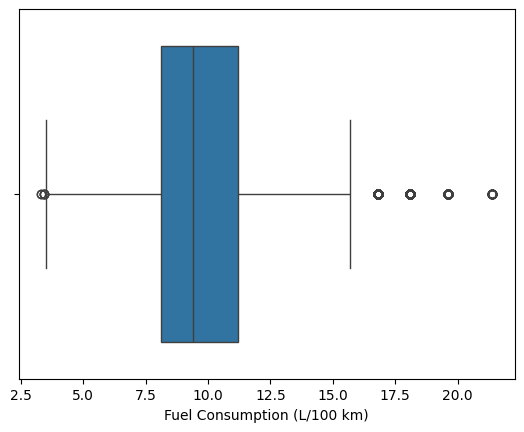

In [53]:
sns.boxplot(x=fuel['Fuel Consumption (L/100 km)'])

# Exploratory Data Analysis (EDA)

### Descriptive Statistics and Visualization

Summarizing data using methods like describe()

In [54]:
fuel.describe()

,Model year,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Fuel Consumption (L/100 km),CO2 emissions (g/km),CO2 rating,Smog rating
count,20510.000000,20510.000000,20510.000000,20510.000000,20510.000000,20510.000000,20510.000000,20510.000000,20510.000000,7715.000000
mean,2014.239005,3.339103,5.826426,13.435768,9.714276,11.761121,9.801784,266.779912,4.545051,4.824887
std,5.586785,1.353446,1.869976,3.779841,2.520023,3.175759,2.651370,63.495227,1.602357,1.785794
min,2005.000000,0.800000,2.000000,4.000000,3.900000,4.000000,3.312887,94.000000,1.000000,1.000000
25%,2009.000000,2.200000,4.000000,10.800000,8.000000,9.600000,8.110862,221.000000,4.000000,3.000000
50%,2014.000000,3.000000,6.000000,13.000000,9.300000,11.300000,9.408600,262.000000,5.000000,5.000000
75%,2019.000000,4.000000,8.000000,15.500000,11.000000,13.400000,11.200714,304.000000,5.000000,6.000000
max,2024.000000,8.400000,16.000000,30.600000,22.100000,26.100000,21.383182,608.000000,10.000000,8.000000


In [55]:
# We want to do statistical analysis by Vehicle Class against City (L/100 km)
# We want to know which Vehicle class give us a good milleage when we drive it in City

fuel.groupby('Vehicle class')['City (L/100 km)'].describe()

,count,mean,std,min,25%,50%,75%,max
Vehicle class,,,,,,,,
Compact,2585.0,11.405145,2.950398,4.4,9.40,11.10,13.000,23.0
Full-size,1445.0,14.316955,3.508140,4.0,12.50,14.40,16.000,25.1
Mid-size,2734.0,11.960424,3.441718,4.3,9.60,11.70,13.800,25.1
Minicompact,953.0,12.733368,2.707319,6.5,11.00,12.80,14.300,24.9
Minivan,308.0,14.301948,2.706837,6.6,12.90,13.90,14.900,20.4
Pickup truck: Small,503.0,13.786481,1.681472,5.6,12.60,13.60,15.000,17.4
Pickup truck: Standard,1840.0,16.597717,3.316872,9.5,14.60,16.10,18.225,29.1
Special purpose vehicle,119.0,11.834454,1.796958,9.7,10.00,11.50,12.600,16.8
Sport utility vehicle,1980.0,15.177879,3.417447,6.8,12.50,14.70,17.300,29.1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Compact'),
  Text(1, 0, 'Full-size'),
  Text(2, 0, 'Mid-size'),
  Text(3, 0, 'Minicompact'),
  Text(4, 0, 'Minivan'),
  Text(5, 0, 'Pickup truck: Small'),
  Text(6, 0, 'Pickup truck: Standard'),
  Text(7, 0, 'Special purpose vehicle'),
  Text(8, 0, 'Sport utility vehicle'),
  Text(9, 0, 'Sport utility vehicle: Small'),
  Text(10, 0, 'Sport utility vehicle: Standard'),
  Text(11, 0, 'Station wagon: Mid-size'),
  Text(12, 0, 'Station wagon: Small'),
  Text(13, 0, 'Subcompact'),
  Text(14, 0, 'Two-seater'),
  Text(15, 0, 'Van: Cargo'),
  Text(16, 0, 'Van: Passenger')])

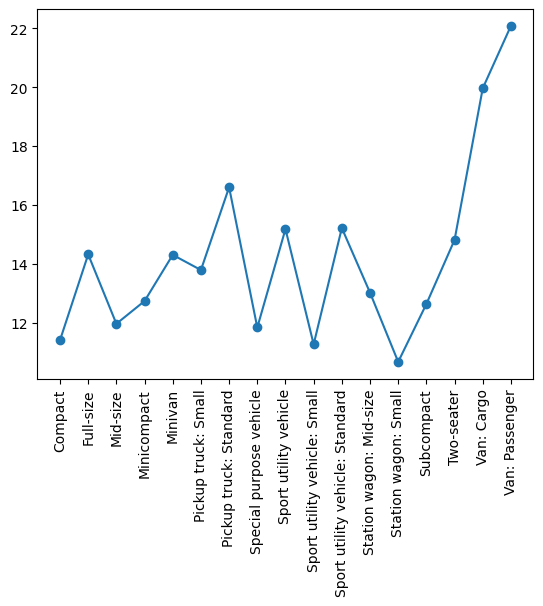

In [65]:
# Let us plot that in a graph

plt.plot(fuel.groupby('Vehicle class')['City (L/100 km)'].describe()['mean'], marker='o')
plt.xticks(rotation ='vertical')

In [64]:
# We want to know which Vehicle class give us a good milleage when we drive it in Highway

fuel.groupby('Vehicle class')['Highway (L/100 km)'].describe()

,count,mean,std,min,25%,50%,75%,max
Vehicle class,,,,,,,,
Compact,2585.0,8.131954,1.674011,4.5,6.900,7.9,9.00,14.3
Full-size,1445.0,9.639446,2.038068,3.9,8.400,9.6,10.60,17.4
Mid-size,2734.0,8.355340,1.907648,4.2,7.000,8.1,9.40,17.4
Minicompact,953.0,9.063064,1.564724,5.7,8.300,9.1,9.90,16.0
Minivan,308.0,10.099351,1.720522,6.5,9.275,9.7,10.40,14.6
Pickup truck: Small,503.0,10.549105,1.339439,7.1,9.600,10.4,11.50,15.1
Pickup truck: Standard,1840.0,12.416141,2.274388,7.1,10.800,12.0,13.60,22.1
Special purpose vehicle,119.0,9.349580,1.133532,7.9,8.500,8.9,10.00,12.1
Sport utility vehicle,1980.0,11.212374,2.309633,7.3,9.600,10.7,12.60,22.1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Compact'),
  Text(1, 0, 'Full-size'),
  Text(2, 0, 'Mid-size'),
  Text(3, 0, 'Minicompact'),
  Text(4, 0, 'Minivan'),
  Text(5, 0, 'Pickup truck: Small'),
  Text(6, 0, 'Pickup truck: Standard'),
  Text(7, 0, 'Special purpose vehicle'),
  Text(8, 0, 'Sport utility vehicle'),
  Text(9, 0, 'Sport utility vehicle: Small'),
  Text(10, 0, 'Sport utility vehicle: Standard'),
  Text(11, 0, 'Station wagon: Mid-size'),
  Text(12, 0, 'Station wagon: Small'),
  Text(13, 0, 'Subcompact'),
  Text(14, 0, 'Two-seater'),
  Text(15, 0, 'Van: Cargo'),
  Text(16, 0, 'Van: Passenger')])

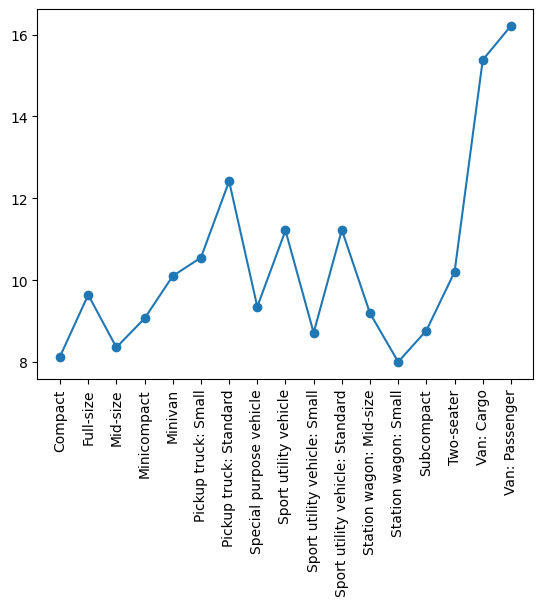

In [67]:
plt.plot(fuel.groupby('Vehicle class')['Highway (L/100 km)'].describe()['mean'], marker='o')
plt.xticks(rotation ='vertical')

In [58]:
fuel.groupby('Vehicle class')['Fuel Consumption (L/100 km)'].describe()

,count,mean,std,min,25%,50%,75%,max
Vehicle class,,,,,,,,
Compact,2585.0,8.278566,1.967700,3.733571,6.918088,8.110862,9.408600,15.681000
Full-size,1445.0,10.184156,2.369552,3.312887,9.046731,10.226739,11.200714,18.093462
Mid-size,2734.0,8.609223,2.268187,3.675234,6.918088,8.400536,9.800625,18.093462
Minicompact,953.0,9.222937,1.802276,5.113370,8.110862,9.408600,10.226739,16.801071
Minivan,308.0,10.315896,1.869862,5.470116,9.408600,9.800625,10.691591,14.700938
Pickup truck: Small,503.0,10.274392,1.236804,5.227000,9.408600,10.226739,11.200714,13.067500
Pickup truck: Standard,1840.0,12.271203,2.355461,7.350469,10.691591,11.760750,13.836176,21.383182
Special purpose vehicle,119.0,8.924008,1.225337,7.587581,7.840500,8.711667,9.408600,12.379737
Sport utility vehicle,1980.0,11.158125,2.415615,6.031154,9.408600,10.691591,12.379737,21.383182


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Compact'),
  Text(1, 0, 'Full-size'),
  Text(2, 0, 'Mid-size'),
  Text(3, 0, 'Minicompact'),
  Text(4, 0, 'Minivan'),
  Text(5, 0, 'Pickup truck: Small'),
  Text(6, 0, 'Pickup truck: Standard'),
  Text(7, 0, 'Special purpose vehicle'),
  Text(8, 0, 'Sport utility vehicle'),
  Text(9, 0, 'Sport utility vehicle: Small'),
  Text(10, 0, 'Sport utility vehicle: Standard'),
  Text(11, 0, 'Station wagon: Mid-size'),
  Text(12, 0, 'Station wagon: Small'),
  Text(13, 0, 'Subcompact'),
  Text(14, 0, 'Two-seater'),
  Text(15, 0, 'Van: Cargo'),
  Text(16, 0, 'Van: Passenger')])

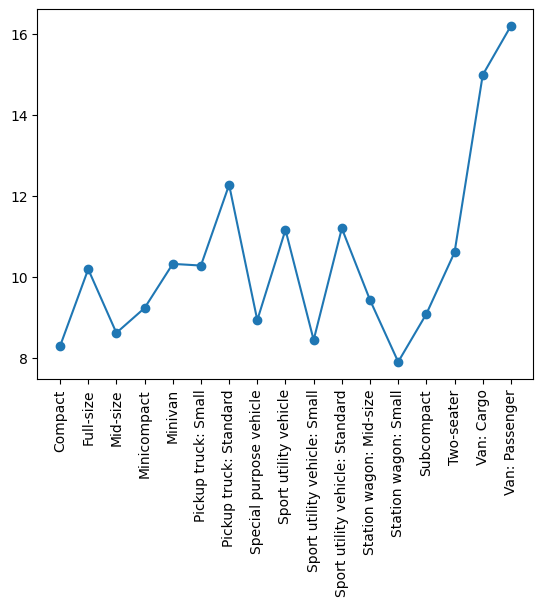

In [68]:
plt.plot(fuel.groupby('Vehicle class')['Fuel Consumption (L/100 km)'].describe()['mean'], marker='o')
plt.xticks(rotation ='vertical')

In [59]:
fuel.groupby('Engine size (L)')['Fuel Consumption (L/100 km)'].describe()['mean']

Engine size (L)
0.8     4.355833
0.9     5.691420
1.0     5.623591
1.2     5.654148
1.3     7.263025
         ...    
6.8    16.318989
7.0    10.882512
8.0    19.815424
8.3    18.010239
8.4    13.045716
Name: mean, Length: 61, dtype: float64

Text(0, 0.5, 'Fuel Consumption (L/100 km)')

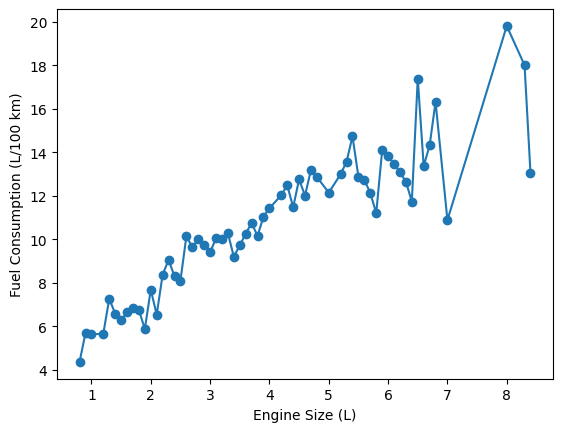

In [69]:
plt.plot(fuel.groupby('Engine size (L)')['Fuel Consumption (L/100 km)'].describe()['mean'], marker='o')
plt.xlabel('Engine Size (L)')
plt.ylabel('Fuel Consumption (L/100 km)')

In [61]:
# Let us try to get the columns based on numerical values
fuel.select_dtypes(include=[np.number]).corr()

,Model year,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Fuel Consumption (L/100 km),CO2 emissions (g/km),CO2 rating,Smog rating
Model year,1.000000,-0.126289,-0.101354,-0.250850,-0.216449,-0.241512,-0.240531,-0.214663,0.097350,0.077940
Engine size (L),-0.126289,1.000000,0.916757,0.820709,0.760748,0.808824,0.808658,0.835745,-0.790743,-0.413041
Cylinders,-0.101354,0.916757,1.000000,0.795523,0.711191,0.774554,0.773904,0.819610,-0.765641,-0.436803
City (L/100 km),-0.250850,0.820709,0.795523,1.000000,0.949239,0.993575,0.991987,0.920326,-0.870391,-0.451719
Highway (L/100 km),-0.216449,0.760748,0.711191,0.949239,1.000000,0.978530,0.977218,0.887903,-0.841677,-0.370158
Combined (L/100 km),-0.241512,0.808824,0.774554,0.993575,0.978530,1.000000,0.998488,0.919557,-0.870387,-0.430776
Fuel Consumption (L/100 km),-0.240531,0.808658,0.773904,0.991987,0.977218,0.998488,1.000000,0.918359,-0.869427,-0.431462
CO2 emissions (g/km),-0.214663,0.835745,0.819610,0.920326,0.887903,0.919557,0.918359,1.000000,-0.951241,-0.456212
CO2 rating,0.097350,-0.790743,-0.765641,-0.870391,-0.841677,-0.870387,-0.869427,-0.951241,1.000000,0.451748
Smog rating,0.077940,-0.413041,-0.436803,-0.451719,-0.370158,-0.430776,-0.431462,-0.456212,0.451748,1.000000


<Axes: >

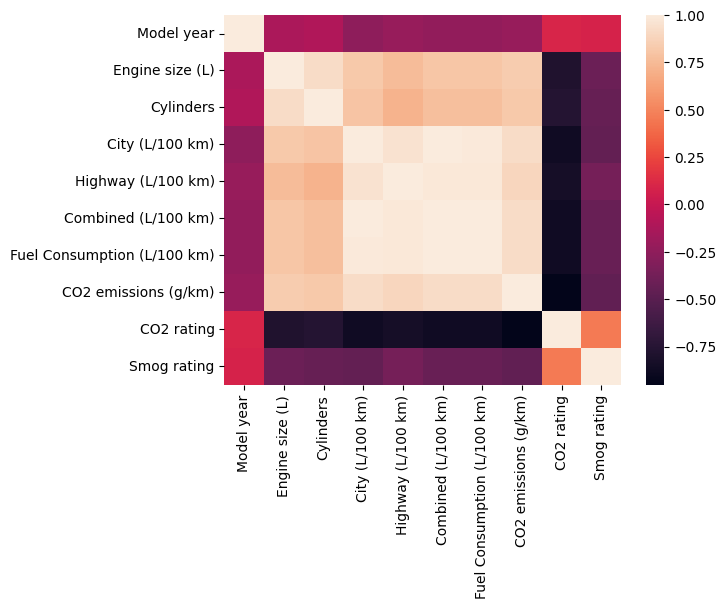

In [62]:
sns.heatmap(fuel.select_dtypes(include=[np.number]).corr())

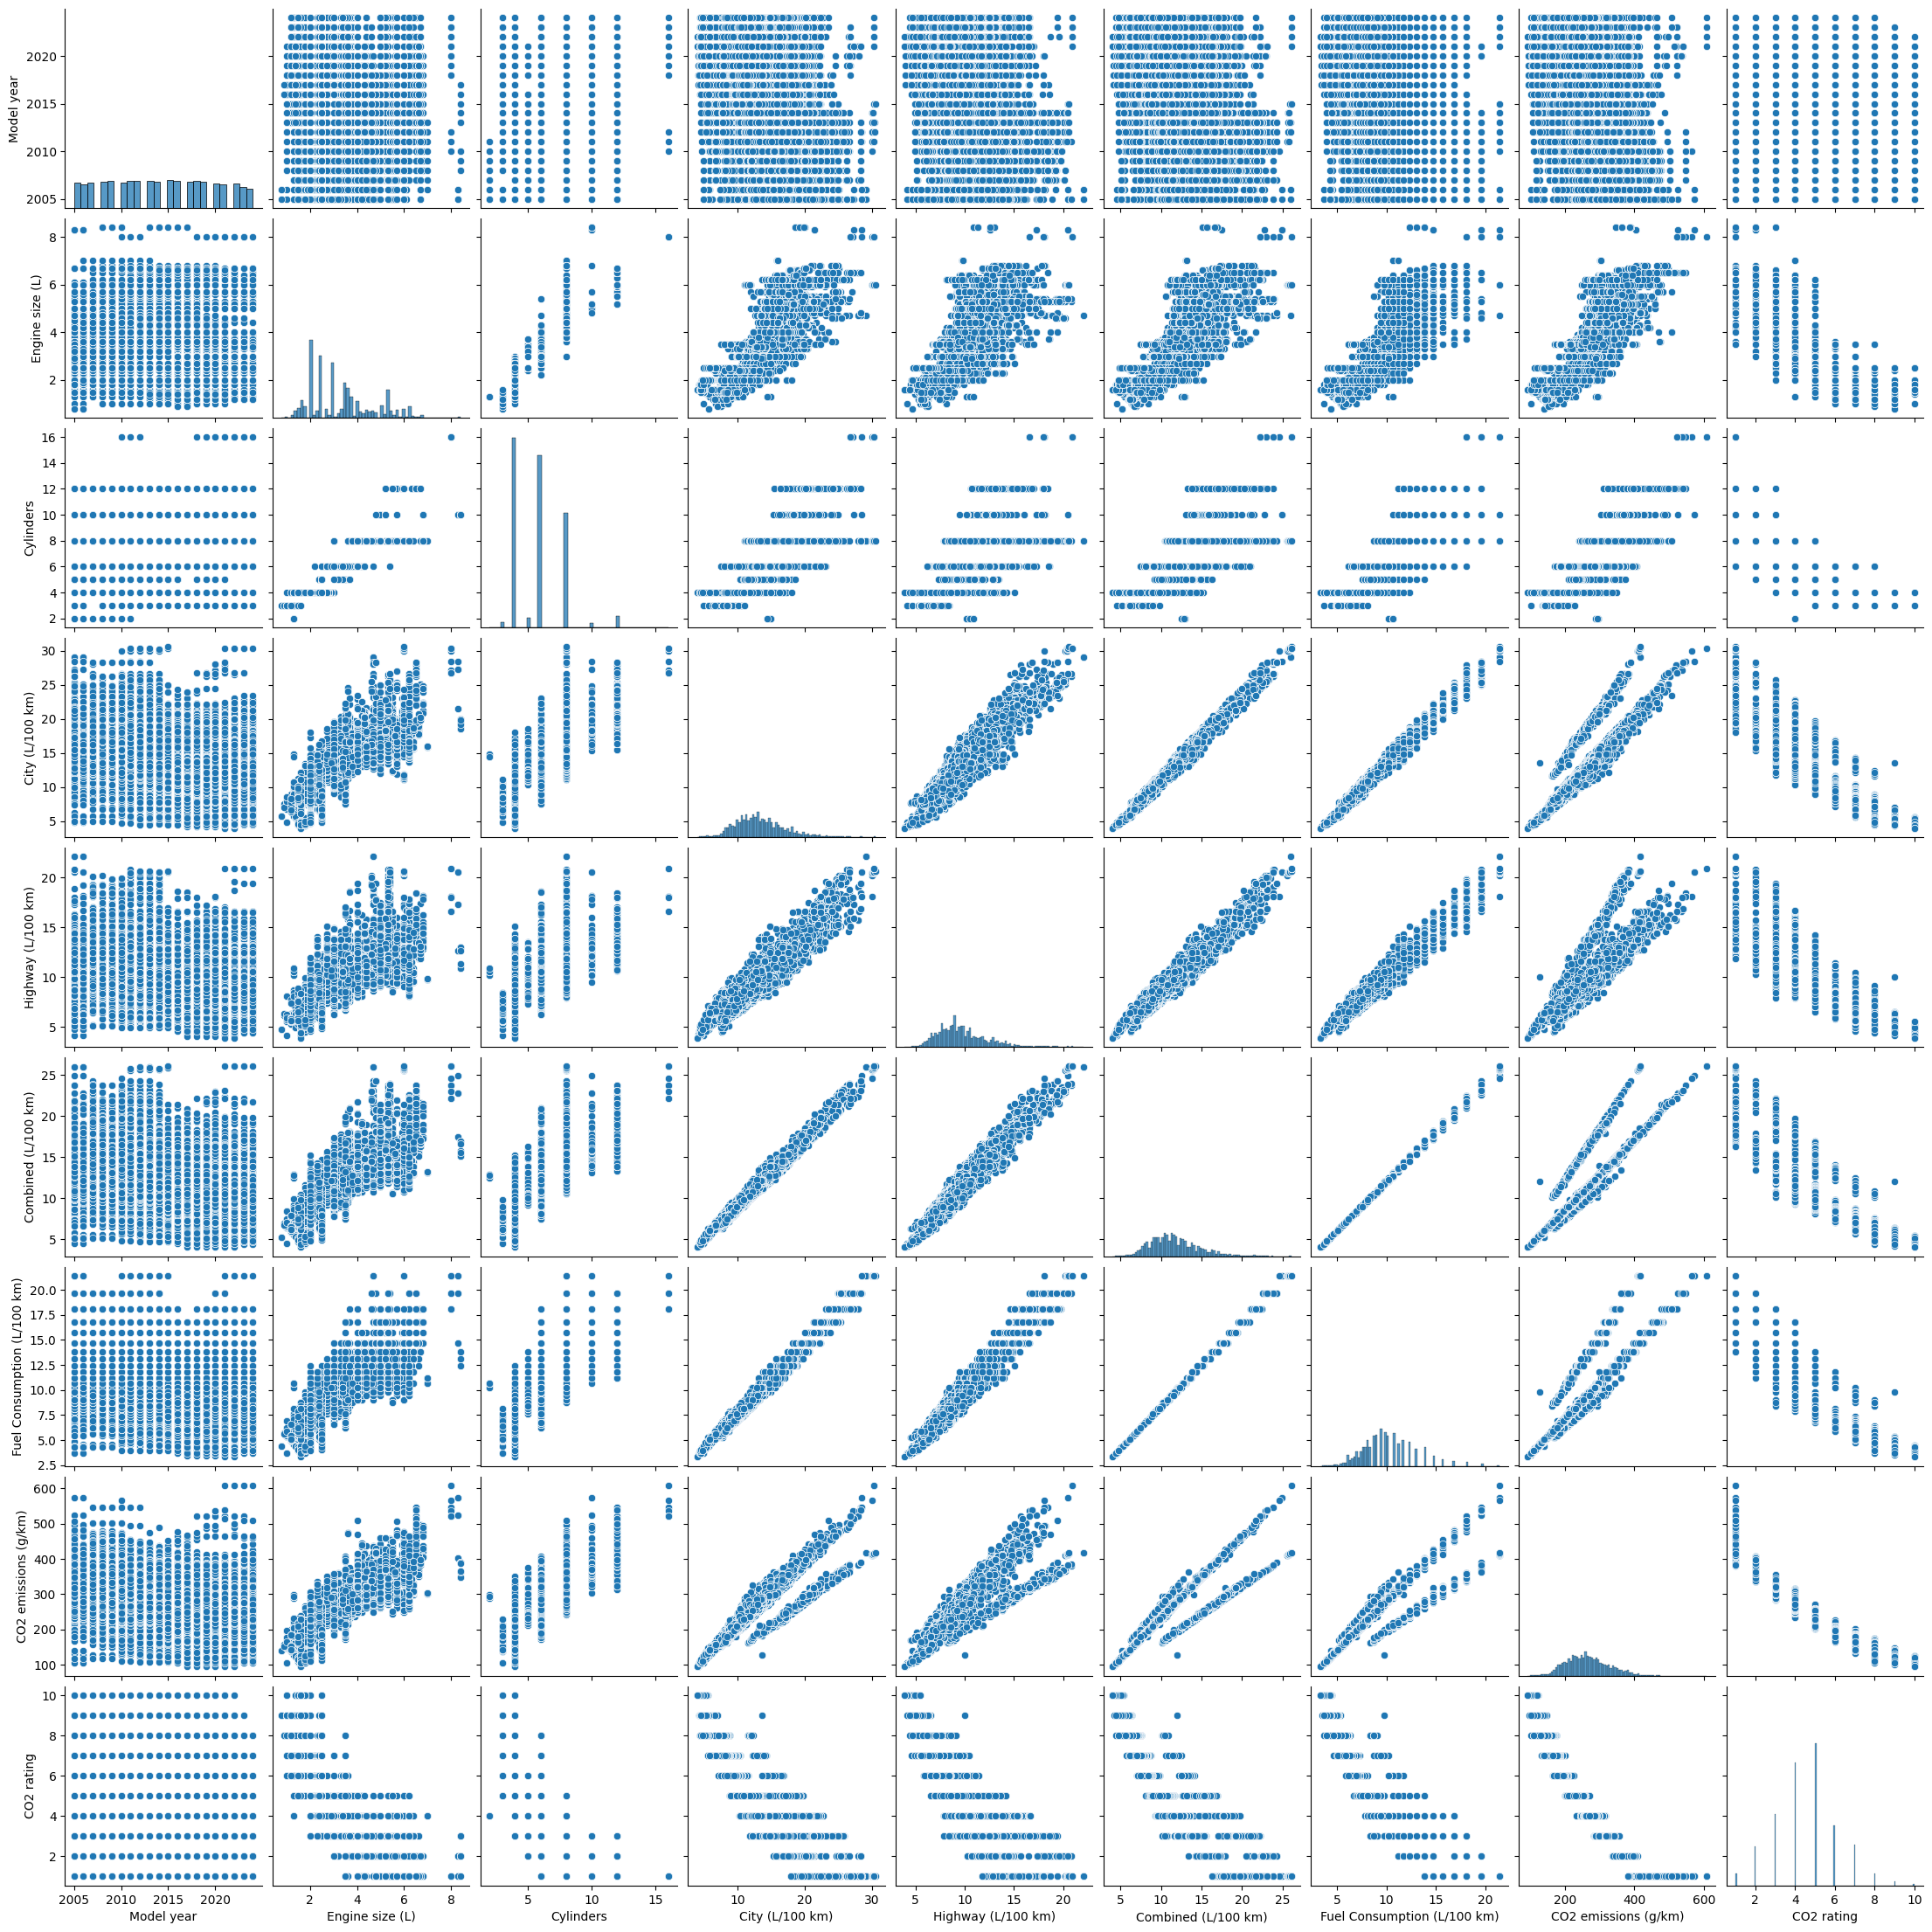

In [63]:
sns.pairplot(fuel.loc[:, (fuel.columns != 'Smog rating')].select_dtypes(include=[np.number]))